<a href="https://colab.research.google.com/github/YHFTF/AI_lab/blob/main/week3(IO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install boto3

In [15]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


File: data/sample1.m4a, Shape: torch.Size([1, 177152]), Sample Rate: 44100


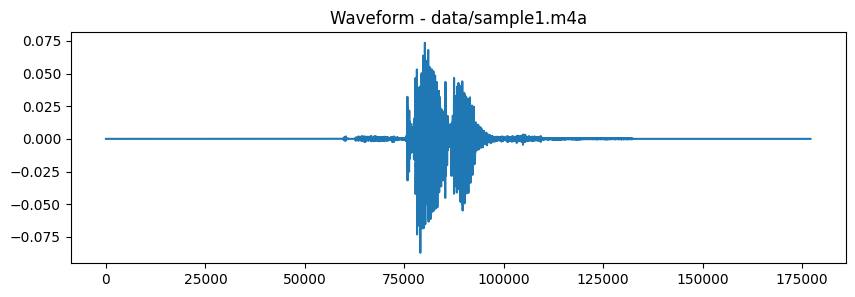

File: data/sample2.m4a, Shape: torch.Size([1, 177152]), Sample Rate: 44100


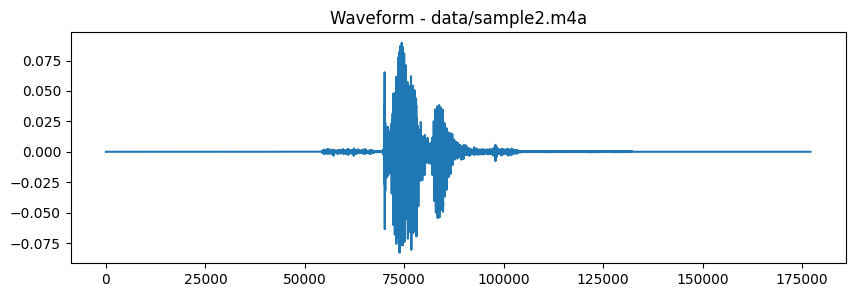

File: data/sample3.m4a, Shape: torch.Size([1, 177152]), Sample Rate: 44100


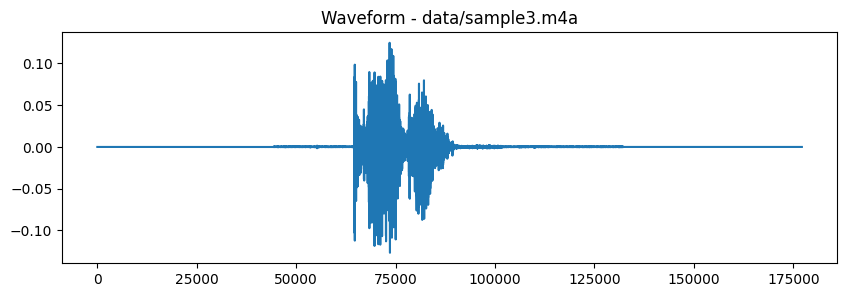

File: data/sample4.m4a, Shape: torch.Size([1, 177152]), Sample Rate: 44100


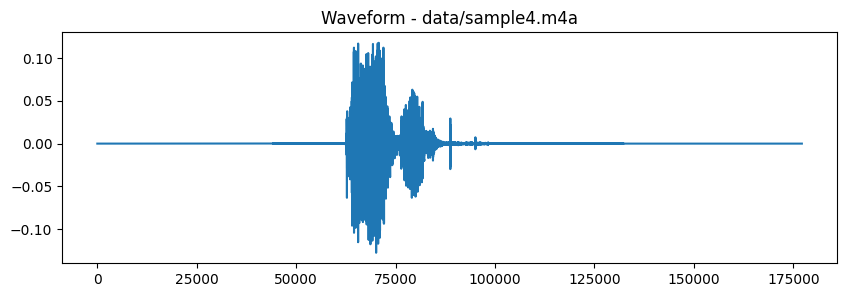

In [18]:
import os
import matplotlib.pyplot as plt
import torchaudio

SAMPLE1 = "data/sample1.m4a"
SAMPLE2 = "data/sample2.m4a"
SAMPLE3 = "data/sample3.m4a"
SAMPLE4 = "data/sample4.m4a"

FILES = [SAMPLE1, SAMPLE2, SAMPLE3, SAMPLE4]

def _hide_seek(obj):
    class _wrapper:
        def __init__(self, obj):
            self.obj = obj
        def read(self, n):
            return self.obj.read(n)
    return _wrapper(obj)

for f in FILES:
    waveform, sr = torchaudio.load(f)
    print(f"File: {f}, Shape: {waveform.shape}, Sample Rate: {sr}")

    plt.figure(figsize=(10,3))
    plt.plot(waveform.t().numpy())
    plt.title(f"Waveform - {f}")
    plt.show()

In [19]:
import torchaudio

FILES = [
    "data/sample1.m4a",
    "data/sample2.m4a",
    "data/sample3.m4a",
    "data/sample4.m4a"
]

for f in FILES:
    metadata = torchaudio.info(f)
    print(f"=== {f} ===")
    print(metadata)
    print()

=== data/sample1.m4a ===
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)

=== data/sample2.m4a ===
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)

=== data/sample3.m4a ===
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)

=== data/sample4.m4a ===
AudioMetaData(sample_rate=44100, num_frames=174, num_channels=1, bits_per_sample=0, encoding=AAC)



/tmp/ipython-input-1403885511.py:11: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(f)
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:20: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s = torchaudio.io.

In [43]:
import torchaudio

for f in FILES:
    waveform, sample_rate = torchaudio.load(f)
    print(f"=== {f} ===")
    print("Waveform shape:", waveform.shape)
    print("Sample rate:", sample_rate)
    print()

=== data/sample1.m4a ===
Waveform shape: torch.Size([1, 177152])
Sample rate: 44100

=== data/sample2.m4a ===
Waveform shape: torch.Size([1, 177152])
Sample rate: 44100

=== data/sample3.m4a ===
Waveform shape: torch.Size([1, 177152])
Sample rate: 44100

=== data/sample4.m4a ===
Waveform shape: torch.Size([1, 177152])
Sample rate: 44100



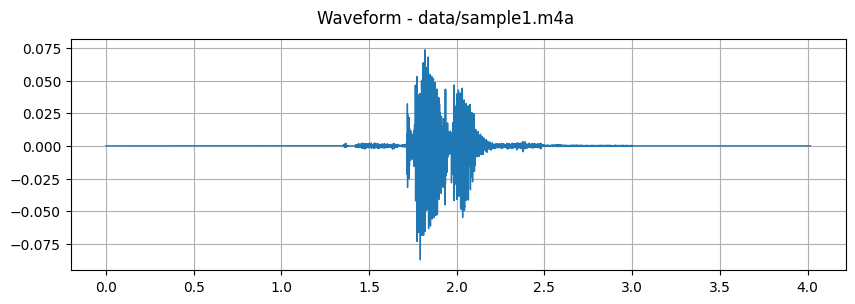

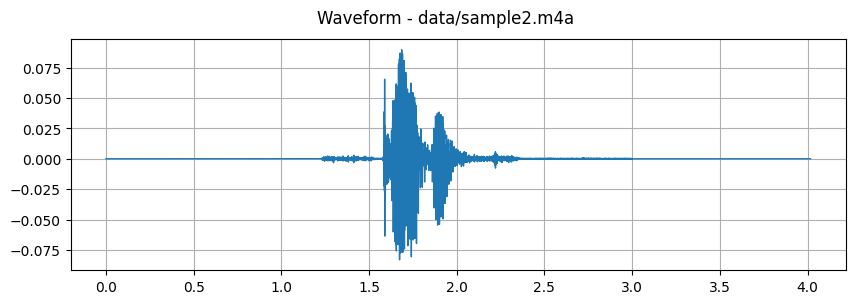

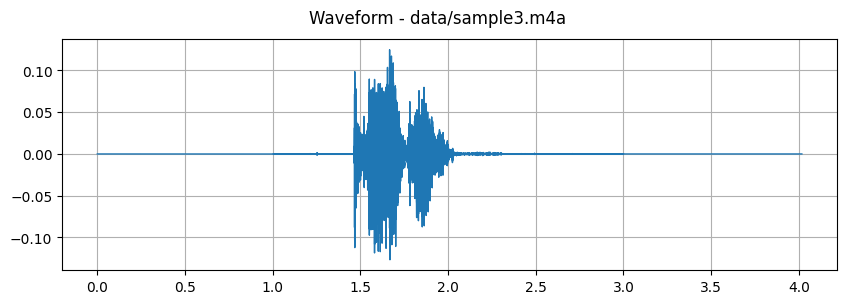

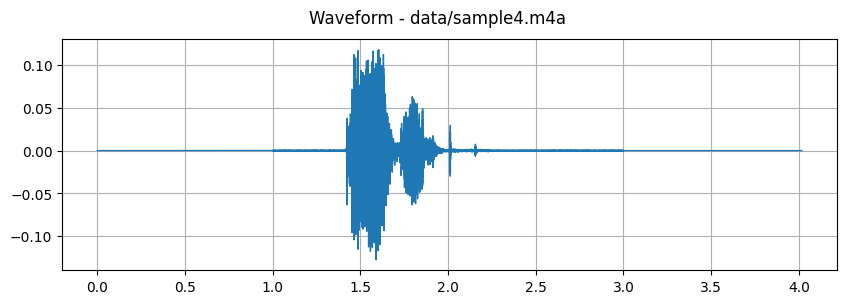

In [42]:
import torch
import torchaudio
import matplotlib.pyplot as plt

def plot_waveform(waveform, sample_rate, title="Waveform"):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1, figsize=(10, 3*num_channels))
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show()

for f in FILES:
    waveform, sample_rate = torchaudio.load(f)
    plot_waveform(waveform, sample_rate, title=f"Waveform - {f}")


In [24]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

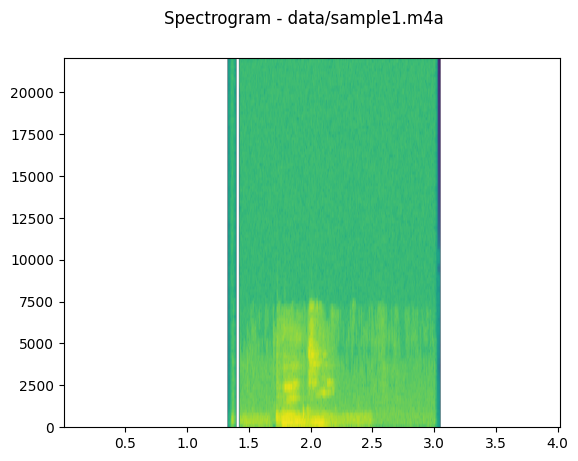

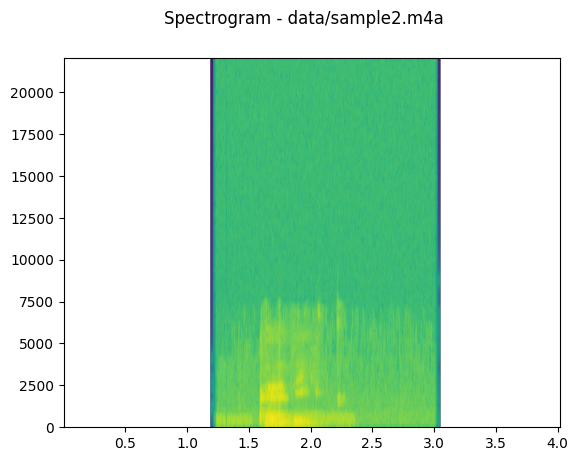

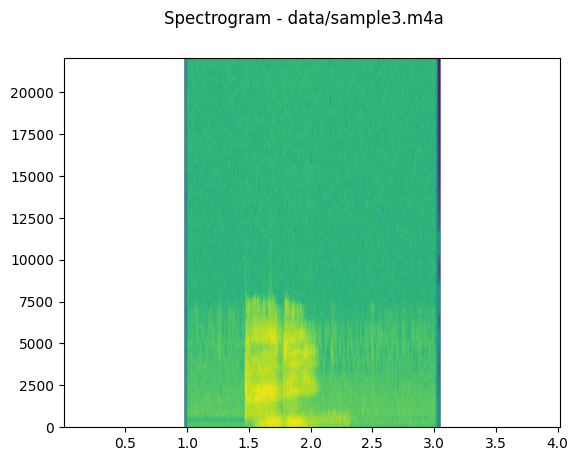

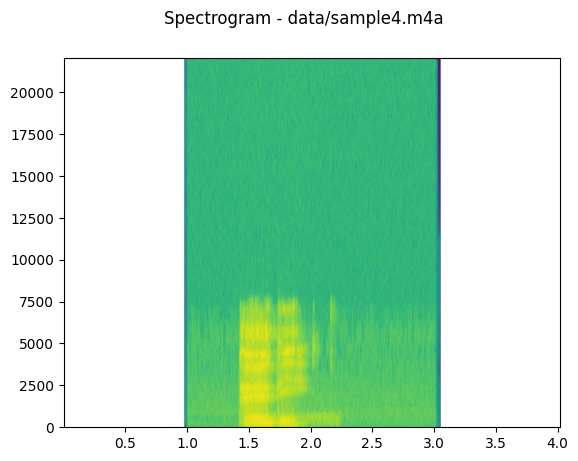

In [41]:
for f in FILES:
    waveform, sample_rate = torchaudio.load(f)
    plot_specgram(waveform, sample_rate, title=f"Spectrogram - {f}")


In [44]:
from IPython.display import Audio
import torchaudio

for f in FILES:
    waveform, sample_rate = torchaudio.load(f)
    print(f"Playing {f} ...")
    display(Audio(waveform.numpy()[0], rate=sample_rate))


Playing data/sample1.m4a ...


Playing data/sample2.m4a ...


Playing data/sample3.m4a ...


Playing data/sample4.m4a ...


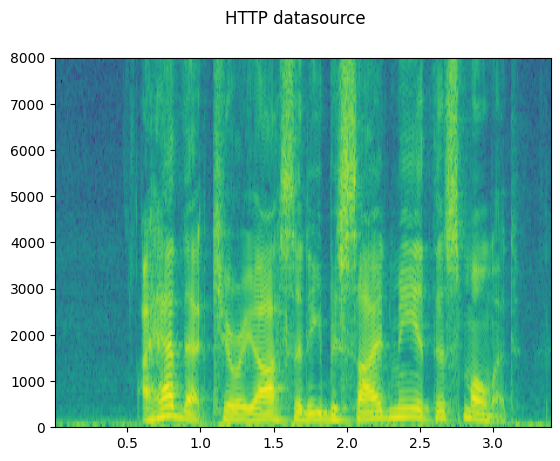

In [27]:
url = "https://download.pytorch.org/torchaudio/tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
with requests.get(url, stream=True) as response:
    waveform, sample_rate = torchaudio.load(_hide_seek(response.raw))
plot_specgram(waveform, sample_rate, title="HTTP datasource")

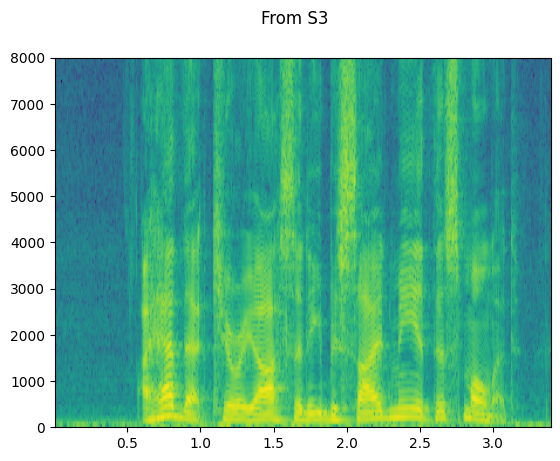

In [28]:
bucket = "pytorch-tutorial-assets"
key = "VOiCES_devkit/source-16k/train/sp0307/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
client = boto3.client("s3", config=Config(signature_version=UNSIGNED))
response = client.get_object(Bucket=bucket, Key=key)
waveform, sample_rate = torchaudio.load(_hide_seek(response["Body"]))
plot_specgram(waveform, sample_rate, title="From S3")

In [29]:
# Illustration of two different decoding methods.
# The first one will fetch all the data and decode them, while
# the second one will stop fetching data once it completes decoding.
# The resulting waveforms are identical.

frame_offset, num_frames = 16000, 16000  # Fetch and decode the 1 - 2 seconds

url = "https://download.pytorch.org/torchaudio/tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
print("Fetching all the data...")
with requests.get(url, stream=True) as response:
    waveform1, sample_rate1 = torchaudio.load(_hide_seek(response.raw))
    waveform1 = waveform1[:, frame_offset : frame_offset + num_frames]
    print(f" - Fetched {response.raw.tell()} bytes")

print("Fetching until the requested frames are available...")
with requests.get(url, stream=True) as response:
    waveform2, sample_rate2 = torchaudio.load(
        _hide_seek(response.raw), frame_offset=frame_offset, num_frames=num_frames
    )
    print(f" - Fetched {response.raw.tell()} bytes")

print("Checking the resulting waveform ... ", end="")
assert (waveform1 == waveform2).all()
print("matched!")

Fetching all the data...
 - Fetched 108844 bytes
Fetching until the requested frames are available...
 - Fetched 108844 bytes
Checking the resulting waveform ... matched!


In [30]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

In [31]:
def inspect_file(path):
    print("-" * 10)
    print("Source:", path)
    print("-" * 10)
    print(f" - File size: {os.path.getsize(path)} bytes")
    print(f" - {torchaudio.info(path)}")
    print()

In [32]:
with tempfile.TemporaryDirectory() as tempdir:
    path = f"{tempdir}/save_example_default.wav"
    torchaudio.save(path, waveform, sample_rate)
    inspect_file(path)

----------
Source: /tmp/tmp8i7vrb_l/save_example_default.wav
----------
 - File size: 108878 bytes
 - AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)



/tmp/ipython-input-3348391189.py:6: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print(f" - {torchaudio.info(path)}")


In [33]:
with tempfile.TemporaryDirectory() as tempdir:
    path = f"{tempdir}/save_example_PCM_S16.wav"
    torchaudio.save(path, waveform, sample_rate, encoding="PCM_S", bits_per_sample=16)
    inspect_file(path)

----------
Source: /tmp/tmp1gbqh9r9/save_example_PCM_S16.wav
----------
 - File size: 108878 bytes
 - AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)



/tmp/ipython-input-3348391189.py:6: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print(f" - {torchaudio.info(path)}")


In [34]:
formats = [
    "flac",
    # "vorbis",
    # "sph",
    # "amb",
    # "amr-nb",
    # "gsm",
]

In [35]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV_8000)
with tempfile.TemporaryDirectory() as tempdir:
    for format in formats:
        path = f"{tempdir}/save_example.{format}"
        torchaudio.save(path, waveform, sample_rate, format=format)
        inspect_file(path)

----------
Source: /tmp/tmprnf_kzhf/save_example.flac
----------
 - File size: 45264 bytes
 - AudioMetaData(sample_rate=8000, num_frames=27200, num_channels=1, bits_per_sample=16, encoding=FLAC)



/tmp/ipython-input-3348391189.py:6: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print(f" - {torchaudio.info(path)}")


In [36]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

# Saving to bytes buffer
buffer_ = io.BytesIO()
torchaudio.save(buffer_, waveform, sample_rate, format="wav")

buffer_.seek(0)
print(buffer_.read(16))

b'RIFFF\xa9\x01\x00WAVEfmt '
